In [1]:
import pandas as pd
import numpy as np
import json
import requests
from api_keys import stockorg_key 

In [37]:
base_url = r"https://api.stockdata.org/v1/data/eod?"
symbols = ["AAPL"]
url = base_url + f"symbols={symbols[0]}&api_token={stockorg_key}&date_from=2000"

In [38]:
req = requests.get(url)


In [50]:
res = json.loads(req.content)

In [58]:
stock_data = pd.DataFrame(res["data"])

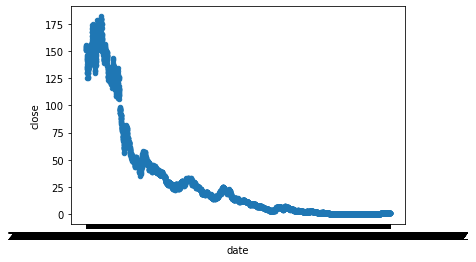

In [40]:
stock_data.plot(kind="scatter", x="date", y="close")

In [66]:
indicators = ["MACD","RSI","VWAP","12EMA","26EMA","50EMA","200EMA","12SMA","26SMA","50SMA","200SMA"]

In [74]:
# stock_data["MACD"] = ""
more_stock_data = pd.concat([stock_data,pd.DataFrame(columns=list(indicators))])
more_stock_data["date"] = more_stock_data["date"].str[:10] 
more_stock_data.head()


,date,open,high,low,close,volume,MACD,RSI,VWAP,12EMA,26EMA,50EMA,200EMA,12SMA,26SMA,50SMA,200SMA
0,2023-02-17,152.35,153.00,150.85,152.55,59144118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-16,153.51,156.33,153.35,153.71,68167942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-15,153.11,155.50,152.88,155.33,65669252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-14,152.12,153.77,150.86,153.20,61707573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-13,150.95,154.26,150.92,153.85,62199013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# end = date
def ema(df,period, end,mult):
    closingprice = df[] end[closing]#here
    multiplier =  mult/(1+period) 
    return closing * multiplier + ema(df,period,end-1,mult) * (1-multiplier)

more_stock_data["12EMA"] = 